In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Cleaning and Preparation
-  Dec.3,2017 
- Qiang Shen

# Data Cleaning and Preparation

- 1\. Handling Missing Data
- 2\. **Data Transformation: Duplicates, Replacing,Permutation, Sampling,Dummy**

##  Data Transformation

- 1\. Removing duplicates
- 2\. Transforming Data Using a Function or Mapping
- 3\. Replacing Values
- 4\. Renaming Axis Indexes
- 5\. Discretization and Binning
- 6\. Detecting and Filtering Outliers
- 7\. Permutation and Random Sampling
- 8\. Computing Indicator/Dummy Variables

### 1. Duplicates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Duplicates: Series

In [6]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [5]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


#### Duplicates: *DataFrame*

In [7]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [9]:
data.drop_duplicates(['k1'])
data.drop_duplicates(['k1','k2'])

,k1,k2,v1
0,one,1,0
1,two,1,1


,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5


In [ ]:
data.drop_duplicates(['k1', 'k2'],keep='last')

##  2. Transforming Data Using a Function or Mapping

- `map`

#### Transforming Data Using a Function or Mapping

In [11]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [12]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}
meat_to_animal

{'bacon': 'pig',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon',
 'pastrami': 'cow',
 'pulled pork': 'pig'}

In [13]:
lowercased = data['food'].str.lower()
lowercased 

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [14]:
lowercased
meat_to_animal
data['animal'] = lowercased.map(meat_to_animal)
data

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

{'bacon': 'pig',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon',
 'pastrami': 'cow',
 'pulled pork': 'pig'}

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [19]:
data['food']
##func=
data['animal']=data['food'].map(lambda x: meat_to_animal[x.lower()])##[]
data

0          bacon
1    pulled pork
2          bacon
3       Pastrami
4    corned beef
5          Bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


## 3. Replacing Values

In [64]:
##`replace`
help(pd.Series.replace)

Help on function replace in module pandas.core.generic:

replace(self, to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)
    Replace values given in 'to_replace' with 'value'.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, numeric, or None
    
        * str or regex:
    
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_replace` will be replaced with
              `value`
    
        * list of str, regex, or numeric:
    
            - First, if `to_replace` and `value` are both lists, they
              **must** be the same length.
            - Second, if ``regex=True`` then all of the strings in **both**
              lists will be interpreted as regexs otherwise they will match
              directly. This doesn't matter much for `value` since there
              are only a few possible substitution regexes yo

###  Replacing Values

In [65]:
data = pd.Series([1., -9., 2., -9., -1000., 3.])
data=pd.Series(['a','b','x'])
data    

0    a
1    b
2    x
dtype: object

In [66]:
data.replace(-9, np.nan)

0    a
1    b
2    x
dtype: object

In [67]:
data.replace([-9, -1000], np.nan)###list

0    a
1    b
2    x
dtype: object

In [68]:
data.replace([-9, -1000], [np.nan, 0])

0    a
1    b
2    x
dtype: object

In [69]:
data.replace({-999: np.nan, -1000: 0}) ##dict

0    a
1    b
2    x
dtype: object


## 4. Renaming Axis Indexes



### Renaming Axis Indexes


`map`

In [89]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 
                             'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [90]:
transform = lambda x: x[:4].upper()
data.index
data.columns

Index(['Ohio', 'Colorado', 'New York'], dtype='object')

Index(['one', 'two', 'three', 'four'], dtype='object')

In [91]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [93]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11



## 4. Renaming Axis Indexes


- `rename`

In [78]:
data
data.rename(index=str.title, columns=str.upper)

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [79]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'pekaboo'})

,one,two,pekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

## 5. Discretization and Binning

### Discretization and Binning

-  `cut`
- [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
- Bins: 18~25, 26~35, 36~60, >60

In [124]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [125]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)

In [126]:
cats=pd.cut(ages,bins)
ages
cats
cats.categories
cats.codes

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [127]:
coun=cats.value_counts()
coun

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

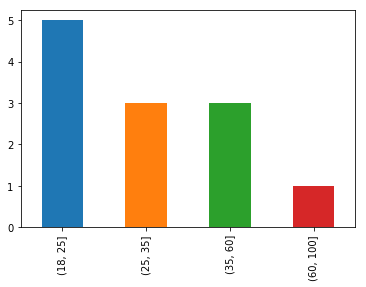

In [128]:
fig=coun.plot(kind='bar')
plt.show()

### Discretization and Binning

-  `cut`
- [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
- Bins: 18~25, 26~35, 36~60, >60

In [129]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

list as labels

In [142]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [143]:
ages;bins;group_names
pd.cut(ages, bins, labels=group_names)

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

[18, 25, 35, 60, 100]

['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

#### Equal length bins
- `cut`

In [153]:
data = np.random.rand(20)

In [154]:
pd.cut(data, 4, precision=2)

[(0.34, 0.54], (0.54, 0.74], (0.74, 0.94], (0.14, 0.34], (0.34, 0.54], ..., (0.74, 0.94], (0.34, 0.54], (0.34, 0.54], (0.14, 0.34], (0.74, 0.94]]
Length: 20
Categories (4, interval[float64]): [(0.14, 0.34] < (0.34, 0.54] < (0.54, 0.74] < (0.74, 0.94]]

#### sample quantiles
- `qcut`

In [148]:
data = np.random.randn(1000) # Normally distributed

In [149]:
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(-0.731, -0.0288], (-0.731, -0.0288], (-0.731, -0.0288], (-0.731, -0.0288], (-3.201, -0.731], ..., (-3.201, -0.731], (-3.201, -0.731], (-0.0288, 0.642], (-3.201, -0.731], (-0.0288, 0.642]]
Length: 1000
Categories (4, interval[float64]): [(-3.201, -0.731] < (-0.731, -0.0288] < (-0.0288, 0.642] < (0.642, 3.723]]

In [150]:
pd.value_counts(cats)

(0.642, 3.723]       250
(-0.0288, 0.642]     250
(-0.731, -0.0288]    250
(-3.201, -0.731]     250
dtype: int64

self-defined quantiles

In [157]:
cats2 = pd.cut(data, [0, 0.1, 0.5, 0.9, 1.]) # cumulative
cats2

[(0.1, 0.5], (0.5, 0.9], (0.5, 0.9], (0.1, 0.5], (0.1, 0.5], ..., (0.5, 0.9], (0.1, 0.5], (0.1, 0.5], (0.1, 0.5], (0.5, 0.9]]
Length: 20
Categories (4, interval[float64]): [(0.0, 0.1] < (0.1, 0.5] < (0.5, 0.9] < (0.9, 1.0]]

In [158]:
pd.value_counts(cats2)

(0.1, 0.5]    10
(0.5, 0.9]     9
(0.9, 1.0]     1
(0.0, 0.1]     0
dtype: int64


## 6. Detecting and Filtering Outliers


###  Detecting and Filtering Outliers

In [227]:
from pydataset import data as datasets
iris=datasets('iris')
iris.head()
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [228]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.010230,0.042799,-0.037453,-0.011049
std,1.014056,0.999999,0.997148,0.999439
min,-3.064249,-3.007777,-3.423982,-3.246424
25%,-0.732913,-0.633949,-0.703191,-0.672614
50%,-0.008863,0.035740,-0.041510,-0.021156
75%,0.766857,0.743280,0.615150,0.645968
max,3.227181,3.587058,3.011646,3.371266


How to cope with the values larger than 3 or smaller than -3


### Detecting and Filtering Outliers

In [230]:
col = data[2]
col[np.abs(col) > 3]

23     3.011646
209   -3.047920
248   -3.167264
666   -3.246592
708   -3.423982
Name: 2, dtype: float64

In [231]:
data[(np.abs(data) > 3).any(1)] # any中axis=1表示column

,0,1,2,3
23,0.687237,0.781585,3.011646,-0.180355
39,1.586952,3.587058,-1.344238,1.199793
158,3.227181,-1.692370,1.110102,0.548197
170,-0.448874,-0.698667,-0.805632,3.342334
209,-0.986868,0.521359,-3.047920,0.876006
248,-0.109864,-0.548162,-3.167264,2.196772
263,-1.139343,3.223314,-0.544648,-1.784378
316,3.052832,1.306758,-1.300902,1.101251
358,-3.037578,-1.339723,-0.854693,-1.156965
455,0.669407,-0.442379,-0.262765,3.122163


In [226]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [223]:
data.iloc[[10,214,227],:]

,0,1,2,3
10,0.600712,-0.805022,2.028799,-0.249804
214,-0.361881,-1.076627,0.244183,-0.267864
227,-0.460769,1.300920,-0.418424,-1.097233


In [167]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.017223,-0.006821,0.010898,-0.028812
std,0.998464,1.017501,0.984759,1.001554
min,-3.000000,-2.763324,-3.000000,-3.000000
25%,-0.618725,-0.711791,-0.637911,-0.685459
50%,0.009046,-0.018827,-0.007661,-0.030324
75%,0.681033,0.689891,0.621596,0.687968
max,3.000000,3.000000,3.000000,3.000000


In [211]:
data.head()
np.sign(data).head()

,0,1,2,3
0,-0.542819,-0.003691,0.733829,0.238581
1,-0.508739,-0.208794,0.664919,1.011302
2,0.439848,0.073734,2.778688,-0.528429
3,0.116812,0.892842,0.011068,2.771866
4,-1.017244,-0.760428,-1.341321,-0.522986


,0,1,2,3
0,-1.0,-1.0,1.0,1.0
1,-1.0,-1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0
4,-1.0,-1.0,-1.0,-1.0


## 7. Permutation and Random Sampling

###  Permutation and Random Sampling

In [22]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [25]:
sampler = np.random.permutation(5)
sampler
df.take(sampler)

array([0, 1, 2, 3, 4])

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [237]:
df.sample(n=3)

,0,1,2,3
0,0,1,2,3
3,12,13,14,15
1,4,5,6,7


with replacement: `replace=True`

In [239]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

4    4
1    7
1    7
0    5
1    7
0    5
0    5
0    5
3    6
1    7
dtype: int64

## 8. Computing Indicator/Dummy Variables

### Computing Indicator/Dummy Variables

In [240]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [243]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [245]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [249]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


### Computing Indicator/Dummy Variables

In [250]:
mnames = ['movie_id', 'title', 'genres']

In [259]:
movies = pd.read_table('../datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')
movies[:5];movies.iloc[:5,:]
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [286]:
x=["Animation|Children's|Comedy","Adventure|Children's|Fantasy",'Comedy|Romance']
all_genres = []
for x in x:
    all_genres.extend(x.split('|'))
all_genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance']

In [299]:
all_genres = []

for x in movies.genres:
    all_genres.extend(x.split('|'))
    
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

### Computing Indicator/Dummy Variables

In [303]:
zero_matrix = np.zeros((len(movies), len(genres)))
zero_matrix.shape

(3883, 18)

In [316]:
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies.head()
dummies.shape

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(3883, 18)

In [317]:
gen = movies.genres[0]
gen
gen.split('|')

"Animation|Children's|Comedy"

['Animation', "Children's", 'Comedy']

In [318]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2])

In [324]:
aList=['This','is','a','test']
for i in range(len(aList)):
    print(i,aList[i])
for index,item in enumerate(aList):
    print(index,item)

0 This
1 is
2 a
3 test
0 This
1 is
2 a
3 test


In [319]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [315]:
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.head()
movies_windic.iloc[2]

,movie_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


movie_id                                   3
title                Grumpier Old Men (1995)
genres                        Comedy|Romance
Genre_Animation                            0
Genre_Children's                           0
Genre_Comedy                               1
Genre_Adventure                            0
Genre_Fantasy                              0
Genre_Romance                              1
Genre_Drama                                0
Genre_Action                               0
Genre_Crime                                0
Genre_Thriller                             0
Genre_Horror                               0
Genre_Sci-Fi                               0
Genre_Documentary                          0
Genre_War                                  0
Genre_Musical                              0
Genre_Mystery                              0
Genre_Film-Noir                            0
Genre_Western                              0
Name: 2, dtype: object

### Computing Indicator/Dummy Variables

In [310]:
np.random.seed(12345)

In [311]:
values = np.random.rand(10)
values

array([ 0.92961609,  0.31637555,  0.18391881,  0.20456028,  0.56772503,
        0.5955447 ,  0.96451452,  0.6531771 ,  0.74890664,  0.65356987])

In [272]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.]

In [273]:
pd.cut(values, bins)

[(0.8, 1.0], (0.2, 0.4], (0.0, 0.2], (0.2, 0.4], (0.4, 0.6], (0.4, 0.6], (0.8, 1.0], (0.6, 0.8], (0.6, 0.8], (0.6, 0.8]]
Categories (5, interval[float64]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [274]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


##  Data Transformation
- 1\. Removing duplicates
- 2\. Transforming Data Using a Function or Mapping
- 3\. Replacing Values
- 4\. Renaming Axis Indexes
- 5\. Discretization and Binning
- 6\. Detecting and Filtering Outliers
- 7\. Permutation and Random Sampling
- 8\. Computing Indicator/Dummy Variables